In [6]:
from eccodes import *

PATH_ERA5 = '../data/ERA5_Wind/adaptor.mars.internal-1695215906.22804-28588-5-c3dcfef5-75bf-4f95-b47b-c572e8f2d096.grib'

f = open(PATH_ERA5,'rb')
gid = codes_grib_new_from_file(f)

values = codes_get_values(gid)


In [8]:
for i in range(len(values)):
    print(values[i])

-0.5587310791015625
-0.3263092041015625
0.0740814208984375
0.4363861083984375
0.7899017333984375
0.9022064208984375
0.8406829833984375
0.4061126708984375
-0.0704498291015625
-0.2745513916015625
-0.1368560791015625
0.2977142333984375
0.5037689208984375
0.2508392333984375
-0.5128326416015625
-1.0899810791015625
-1.4249420166015625
-1.3683013916015625
-1.1768951416015625
-0.8116607666015625
-0.4610748291015625
-0.0587310791015625
0.2811126708984375
0.5447845458984375
0.5154876708984375
0.7371673583984375
0.6551361083984375
1.0594329833984375
1.1463470458984375
0.7068939208984375
0.0994720458984375
-0.8683013916015625
-1.8448638916015625
-1.8018951416015625
-1.8243560791015625
-1.8106842041015625
-1.6759185791015625
-1.5431060791015625
-1.0509185791015625
-0.4425201416015625
0.1912689208984375
0.6736907958984375
1.1297454833984375
1.0643157958984375
0.9891204833984375
0.6775970458984375
0.3328704833984375
0.0369720458984375
-0.0450592041015625
0.0330657958984375
0.2840423583984375
0.562362

.grib file converted to netcdf file using the following command line : 
`grib_to_netcdf -o ../data/ERA5_Wind/WindData.nc ../data/ERA5_Wind/adaptor.mars.internal-1695215906.22804-28588-5-c3dcfef5-75bf-4f95-b47b-c572e8f2d096.grib`

We now try to work from there

In [1]:
import netCDF4 as nc

PATH_ERA5_NC = '../data/ERA5_Wind/WindData.nc'
ds = nc.Dataset(PATH_ERA5_NC)


In [2]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-09-21 09:42:56 GMT by grib_to_netcdf-2.26.0: grib_to_netcdf -o ../data/ERA5_Wind/WindData.nc ../data/ERA5_Wind/adaptor.mars.internal-1695215906.22804-28588-5-c3dcfef5-75bf-4f95-b47b-c572e8f2d096.grib
    dimensions(sizes): longitude(85), latitude(33), time(8784)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u10(time, latitude, longitude), int16 v10(time, latitude, longitude)
    groups: 

In [3]:
lon = ds.variables['longitude']
lon[:].data
# We do have the range of values we wanted

array([-74.  , -73.75, -73.5 , -73.25, -73.  , -72.75, -72.5 , -72.25,
       -72.  , -71.75, -71.5 , -71.25, -71.  , -70.75, -70.5 , -70.25,
       -70.  , -69.75, -69.5 , -69.25, -69.  , -68.75, -68.5 , -68.25,
       -68.  , -67.75, -67.5 , -67.25, -67.  , -66.75, -66.5 , -66.25,
       -66.  , -65.75, -65.5 , -65.25, -65.  , -64.75, -64.5 , -64.25,
       -64.  , -63.75, -63.5 , -63.25, -63.  , -62.75, -62.5 , -62.25,
       -62.  , -61.75, -61.5 , -61.25, -61.  , -60.75, -60.5 , -60.25,
       -60.  , -59.75, -59.5 , -59.25, -59.  , -58.75, -58.5 , -58.25,
       -58.  , -57.75, -57.5 , -57.25, -57.  , -56.75, -56.5 , -56.25,
       -56.  , -55.75, -55.5 , -55.25, -55.  , -54.75, -54.5 , -54.25,
       -54.  , -53.75, -53.5 , -53.25, -53.  ], dtype=float32)

In [4]:
lat = ds.variables['latitude']
lat[:].data
# Once again we do have the range of values we wanted

array([52.  , 51.75, 51.5 , 51.25, 51.  , 50.75, 50.5 , 50.25, 50.  ,
       49.75, 49.5 , 49.25, 49.  , 48.75, 48.5 , 48.25, 48.  , 47.75,
       47.5 , 47.25, 47.  , 46.75, 46.5 , 46.25, 46.  , 45.75, 45.5 ,
       45.25, 45.  , 44.75, 44.5 , 44.25, 44.  ], dtype=float32)

In [5]:
time = ds.variables['time']
time = time[:].data
print('Number of time steps: ',len(time[:].data))
# The length (# of time steps considered is coherent w/ measurement every 1h, for 6months of 30-31 days and over 2 years (2014 and 2015))
# However what is this format? What does 1002936 stands for?
time[0:5].data

Number of time steps:  8784


In [6]:
u10 = ds.variables['u10']
u10[:,:,:].data

array([[[-5.58993326e-01, -3.26112363e-01,  7.39847678e-02, ...,
          1.52242801e+00,  1.86678641e+00,  2.29055341e+00],
        [-8.88080851e-01, -6.85741654e-01, -3.38329069e-01, ...,
          1.16356226e+00,  1.54304370e+00,  1.97750031e+00],
        [-1.06980436e+00, -1.05606056e+00, -8.60593262e-01, ...,
          8.39055998e-01,  1.21930098e+00,  1.73392973e+00],
        ...,
        [-1.64857082e+00, -9.91159310e-01,  6.55857822e-02, ...,
         -8.73426045e+00, -8.83962955e+00, -8.81137841e+00],
        [-1.26756229e+00, -7.53697082e-01,  5.87138849e-02, ...,
         -9.09465329e+00, -9.16489935e+00, -9.11832316e+00],
        [-1.26221748e+00, -8.85790219e-01, -2.65792375e-01, ...,
         -9.94447792e+00, -9.78718783e+00, -9.60393723e+00]],

       [[-7.81948215e-01, -5.33796369e-01, -5.81083688e-02, ...,
          2.73111838e+00,  2.89909809e+00,  3.17015626e+00],
        [-9.86578045e-01, -7.88056569e-01, -4.59732587e-01, ...,
          2.37072555e+00,  2.51427185e

In [11]:
ds.variables['u10'].units
#makes sense!

'm s**-1'

In [5]:
ust = ds.variables['ust']
data = ust[:,:,:].data

In [17]:
type(data)

numpy.ndarray

In [15]:
ds.variables['ust'].units
#makes sense!

'm s**-1'

In [7]:
import numpy as np
x, y = np.meshgrid(list(lon),list(lat)) 

In [7]:
ust = ds.variables['ust']
ust = ust[:].data
ust = np.where(ust == -32767, 0, ust)
vst = ds.variables['vst']
vst = vst[:].data
vst = np.where(vst == -32767, 0, vst)

In [8]:
u10 = ds.variables['u10']
u10 = u10[:].data
v10 = ds.variables['v10']
v10 = v10[:].data


In [9]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


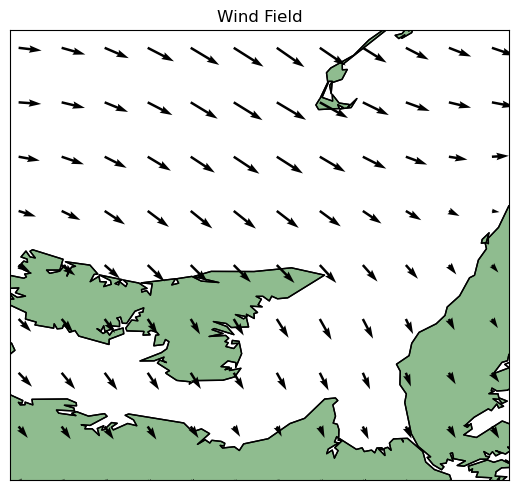

In [63]:
# setting the size of the map
fig,ax = plt.subplots(figsize=(8,5))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
m = Basemap(projection = 'mill', llcrnrlat = 45.5, urcrnrlat = 47.58, llcrnrlon = -63.8, urcrnrlon = -60.9, resolution = 'i')

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='yellowgreen')
#m.drawstates(color='yellowgreen')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')

x_,y_ = m(x,y)

Q = ax.quiver(x_, y_, u10[245,:,:], v10[245,:,:], scale=100, width = 0.005) 
#qk = ax.quiverkey(Q, X=0.9, Y=0.9, U=10,label=r'10 m/s', labelpos='E', coordinates = 'figure')

#plt.legend(loc = 'lower right',framealpha=1)
plt.title('Wind Field')
plt.tight_layout()
plt.show()


In [10]:
from utils.read_data import wind_interpolated
u10_interpolation, v10_interpolation = wind_interpolated(PATH_ERA5_NC)

In [11]:
from utils.read_data import convert_hours_1900_2000

vfunc = np.vectorize(convert_hours_1900_2000) # convert time to fit the rest of the data
time_ok = vfunc(time)

lat_interp = np.linspace(40,60,200)
lon_interp = np.linspace(-65,-45,200)

lon_msh, lat_msh = np.meshgrid(lon_interp, lat_interp)

lon_msh, lat_msh = lon_msh.flatten(), lat_msh.flatten()

u10_interp = np.zeros(len(lon_msh))
v10_interp = np.zeros(len(lon_msh))

for i in range(len(lon_msh)):
    u10_interp[i] = u10_interpolation([time_ok[245], lat_msh[i], lon_msh[i]])
    v10_interp[i] = v10_interpolation([time_ok[245], lat_msh[i], lon_msh[i]])



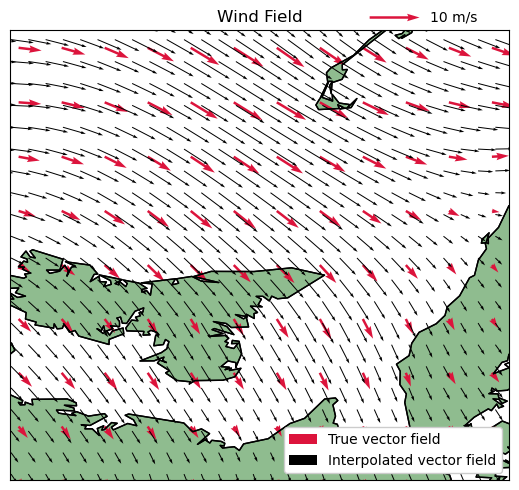

In [16]:
# setting the size of the map
fig,ax = plt.subplots(figsize=(8,5))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
m = Basemap(projection = 'mill', llcrnrlat = 45.5, urcrnrlat = 47.58, llcrnrlon = -63.8, urcrnrlon = -60.9, resolution = 'i')

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='yellowgreen')
#m.drawstates(color='yellowgreen')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')

x_,y_ = m(x,y)
x_interp,y_interp = m(lon_msh,lat_msh)

Q = ax.quiver(x_, y_, u10[245,:,:], v10[245,:,:], scale=100, width = 0.005, color='crimson', label='True vector field') 
Q2 = ax.quiver(x_interp,y_interp, u10_interp, v10_interp, scale=100, width = 0.002, color='k', label='Interpolated vector field')
qk = ax.quiverkey(Q, X=0.7, Y=0.955, U=10,label=r'10 m/s', labelpos='E', coordinates = 'figure')

plt.legend(loc = 'lower right',framealpha=1)
plt.title('Wind Field')
plt.tight_layout()
plt.show()


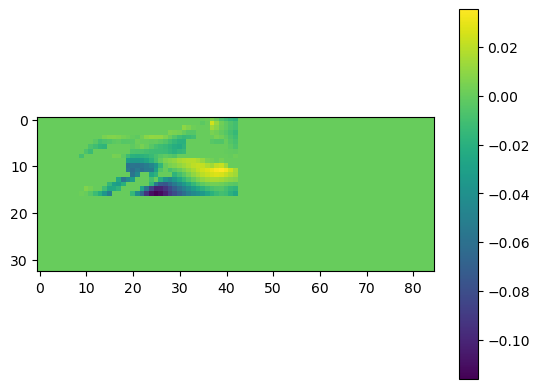

In [74]:
data_first_day = np.array(vst[0,:,:])
#data_first_day[data_first_day == '--'] = np.nan
#data_with_nan = np.where(data_first_day == -30000, np.nan, data_first_day)
#data_masked = np.ma.masked_where(data_first_day == '--', data_first_day)
plt.imshow(data_first_day, interpolation = 'none')
plt.colorbar()

In [71]:
u10 = ds.variables['u10']
u10 = u10[:].data

In [23]:
dtime = nc.num2date(ds.variables['time'][:],ds.variables['time'].units)

In [24]:
dtime

masked_array(data=[cftime.DatetimeGregorian(2014, 6, 1, 0, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2014, 6, 1, 1, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2014, 6, 1, 2, 0, 0, 0, has_year_zero=False),
                   ...,
                   cftime.DatetimeGregorian(2015, 11, 30, 21, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2015, 11, 30, 22, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2015, 11, 30, 23, 0, 0, 0, has_year_zero=False)],
             mask=False,
       fill_value='?',
            dtype=object)

### Uncertainties data

In [2]:
import netCDF4 as nc

PATH_ERA5_NC = '../data/ERA5_Wind/Wind_uncertainties.nc'
ds_err = nc.Dataset(PATH_ERA5_NC)


In [3]:
ds_err

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-10-02 13:05:52 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data1/adaptor.mars.internal-1696251933.4509695-17709-11-07123623-0932-403a-b3f6-215b2fa8fc7e.nc /cache/tmp/07123623-0932-403a-b3f6-215b2fa8fc7e-adaptor.mars.internal-1696251773.68765-17709-18-tmp.grib
    dimensions(sizes): longitude(43), latitude(17), time(2928)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u10(time, latitude, longitude), int16 v10(time, latitude, longitude)
    groups: 

In [4]:
u10_err = ds_err.variables['u10']
u10_err[:,:,:].data

array([[[0.15113177, 0.14819747, 0.16797016, ..., 0.17298105,
         0.12598704, 0.14210314],
        [0.17252962, 0.15921239, 0.16797016, ..., 0.24475863,
         0.17532849, 0.15578151],
        [0.18702056, 0.19546233, 0.20227894, ..., 0.23879974,
         0.21121728, 0.19230231],
        ...,
        [0.29103035, 0.34619526, 0.30326414, ..., 0.24805408,
         0.29545437, 0.31116418],
        [0.21875619, 0.16666101, 0.19889321, ..., 0.30362528,
         0.3580679 , 0.39115782],
        [0.20047322, 0.15979925, 0.20399438, ..., 0.27432739,
         0.25464498, 0.29261036]],

       [[0.12612247, 0.12440703, 0.12806363, ..., 0.18995487,
         0.13149451, 0.16115355],
        [0.11989272, 0.11465612, 0.11172181, ..., 0.12634819,
         0.17993309, 0.24633864],
        [0.11257953, 0.11352754, 0.11266982, ..., 0.23220884,
         0.27762284, 0.33621862],
        ...,
        [0.33766321, 0.39612357, 0.26028787, ..., 0.47070003,
         0.45973024, 0.4323735 ],
        [0.2

In [5]:
ds_err.variables['u10'].units

'm s**-1'